## Converting pressures into depths
- This notebook shows how to use the density profiles built into Thermobar to convert density to depth. 
- In this example, we are using Cpx-only barometry just as an example

In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
out2=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Pyroxene")
Cpxs1=out2['Cpxs']

In [3]:
Calc_P=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs1, 
                                               equationT="T_Put2008_eq32d",
                                               equationP="P_Put2008_eq32b")  
Calc_P

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:2979: UserWarning: This Cpx-only barometer is sensitive to H2O content of the liquid.  By default, this function uses H2O=0 wt%, else you can enter a value of H2O_Liq in the function
  w.warn('This Cpx-only barometer is sensitive to H2O content of the liquid. '


,P_kbar_calc,T_K_calc,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,1.899763,1355.756009,45.19,3.3100,8.88,7.98,0.0764,11.88,20.94,0.6452,0.0000,0.2344,Lava_1_text_cpx1
1,3.880512,1396.492499,48.50,2.5100,6.47,7.11,0.1244,13.07,21.35,0.6048,0.0007,0.1034,Lava_1_text_cpx_1
2,3.661785,1385.544329,48.18,2.6200,6.70,7.63,0.1498,12.77,21.41,0.7057,0.0027,0.2723,Lava_1_text_cpx_1
3,4.496111,1422.672182,49.73,2.0300,5.86,7.03,0.0519,13.67,21.00,0.4540,0.0083,0.1600,Lava_1_text_cpx_2
4,2.921272,1369.518603,46.01,3.2200,8.73,8.08,0.1089,11.95,20.82,0.6429,0.0037,0.0000,Lava_1_text_cpx_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,7.599482,1371.456377,49.40,1.6562,5.24,10.89,0.3292,10.32,21.30,1.3700,0.0000,0.0000,LaPalma_L_cpx121_
570,5.818432,1369.098026,47.24,2.5800,7.77,8.96,0.1829,10.46,21.69,0.9283,0.0000,0.0442,LaPalma_L_cpx122_
571,3.744089,1397.002688,49.08,2.4400,6.36,7.24,0.1570,13.23,21.50,0.6041,0.0194,0.0327,LaPalma_L_cpx124_
572,6.497423,1402.369152,48.25,2.1900,6.44,6.99,0.0776,12.75,20.98,1.2148,0.0168,0.0936,LaPalma_L_cpx126_


## Now convert pressure to depth using a variety of crustal density models

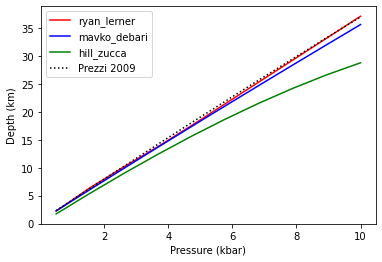

In [5]:
# Lets first examine these density models using a linear array between 0.5 and 10 kbar
P_array=np.linspace(0.5, 10, 10)

ryan_lerner=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="ryan_lerner")

mavko_debari=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="mavko_debari")

prezzi=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="prezzi")


hill_zucca=pt.convert_pressure_to_depth(P_kbar=P_array,
                                      model="hill_zucca")

plt.plot(P_array, ryan_lerner, '-r', label='ryan_lerner')
plt.plot(P_array, mavko_debari, '-b', label='mavko_debari')
plt.plot(P_array, hill_zucca, '-g', label='hill_zucca')
plt.plot(P_array, prezzi, ':k', label='Prezzi 2009')
plt.xlabel('Pressure (kbar)')
plt.ylabel('Depth (km)')
plt.legend()

## Now lets choose one for our samples

In [6]:
Depth_ryan_lerner=pt.convert_pressure_to_depth(P_kbar=Calc_P['P_kbar_calc'], model='ryan_lerner')
Depth_ryan_lerner

0       7.653447
1      14.476528
2      13.716467
3      16.685551
4      11.188643
         ...    
569    28.202109
570    21.592532
571    14.001327
572    24.112308
573    24.250966
Length: 574, dtype: float64

## Or we can use a constant density

In [5]:
Depth_ryan_lerner=pt.convert_pressure_to_depth(P_kbar=Calc_P['P_kbar_calc'], crust_dens_kgm3=2700)
Depth_ryan_lerner

0       7.179753
1      14.665578
2      13.838945
3      16.992104
4      11.040332
         ...    
569    28.720642
570    21.989539
571    14.149996
572    24.555644
573    24.696852
Name: P_kbar_calc, Length: 574, dtype: float64